<a href="https://colab.research.google.com/github/alvesabelardo/ColabGoogle/blob/main/TbFinal_Ci%C3%AAncia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import os
import pandas as pd


df = pd.read_csv('/content/drive/My Drive/fifa/Fifa_world_cup_matches.csv')


In [66]:
#Análise descritiva das colunas
print(df.describe())

       number of goals team1  number of goals team2  total attempts team1  \
count              64.000000              64.000000             64.000000   
mean                1.578125               1.109375             11.140625   
std                 1.551289               1.055856              4.972519   
min                 0.000000               0.000000              2.000000   
25%                 0.000000               0.000000              8.000000   
50%                 1.000000               1.000000             10.000000   
75%                 2.000000               2.000000             14.000000   
max                 7.000000               4.000000             25.000000   

       total attempts team2  conceded team1  conceded team2  \
count             64.000000       64.000000       64.000000   
mean              11.281250        1.109375        1.578125   
std                5.807682        1.055856        1.551289   
min                0.000000        0.000000        0.0

In [67]:
#Tipo de dados de cada coluna
print(df.dtypes)

team1                                object
team2                                object
possession team1                     object
possession team2                     object
possession in contest                object
                                      ...  
own goals team2                       int64
forced turnovers team1                int64
forced turnovers team2                int64
defensive pressures applied team1     int64
defensive pressures applied team2     int64
Length: 88, dtype: object


In [68]:
#Verificar se há valores vazios nas colunas, preenchendo com os valores da média
print(df.isnull().sum())

for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64
team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64


<ipython-input-68-a5b6ba86f232>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


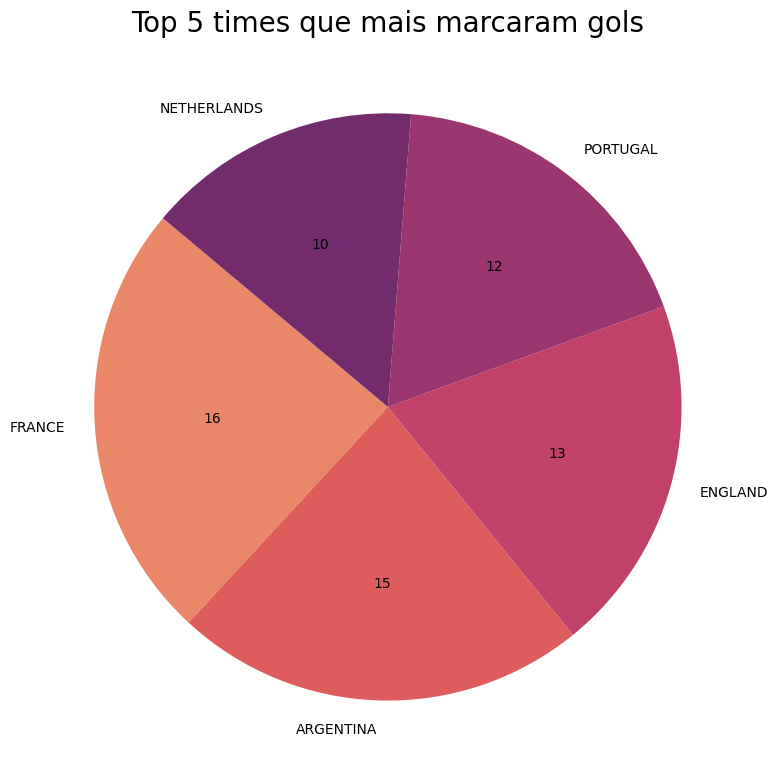

In [64]:
#Os 5 times que marcaram mais gols
import matplotlib.pyplot as plt
import seaborn as sns

top_scorers = df.groupby('team1')['number of goals team1'].sum() + df.groupby('team2')['number of goals team2'].sum()
top_scorers = top_scorers.sort_values(ascending=False)

top_5_scorers = top_scorers.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_scorers.values,
        labels=top_5_scorers.index,
        autopct=lambda p: f"{int(p * sum(top_5_scorers.values) / 100)}",
        startangle=140,
        colors=sns.color_palette("flare", len(top_5_scorers)))
plt.title("Top 5 times que mais marcaram gols", fontsize=20)
plt.tight_layout()
plt.show()


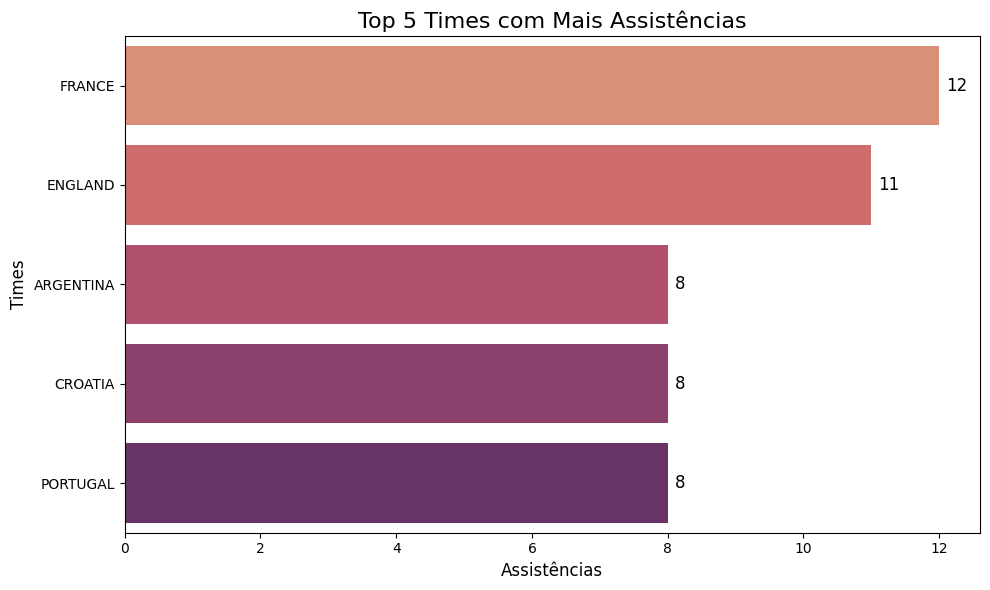

In [63]:
#Os 5 times que tiveram mais assistência
import matplotlib.pyplot as plt
import seaborn as sns

top_assists = df.groupby('team1')['assists team1'].sum() + df.groupby('team2')['assists team2'].sum()
top_assists = top_assists.sort_values(ascending=False)
top_5_assists = top_assists.head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_assists.values, y=top_5_assists.index, palette="flare", hue=top_5_assists.index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

# Títulos e labels
plt.title("Top 5 Times com Mais Assistências", fontsize=16)
plt.xlabel("Assistências", fontsize=12)
plt.ylabel("Times", fontsize=12)

# Ajustar layout
plt.tight_layout()
plt.show()



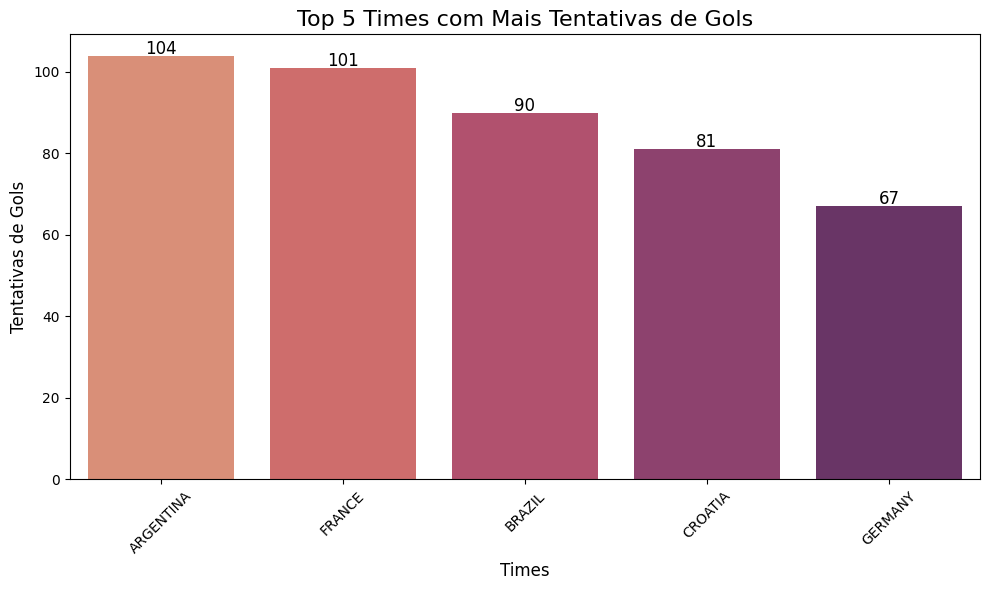

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

tries_goals = df.groupby('team1')['total attempts team1'].sum() + df.groupby('team2')['total attempts team2'].sum()
tries_goals = tries_goals.sort_values(ascending=False)
top_5_tries_goals = tries_goals.head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_tries_goals.index, y=top_5_tries_goals.values, palette="flare", hue=top_5_tries_goals.index)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
# Títulos e labels
plt.title("Top 5 Times com Mais Tentativas de Gols", fontsize=16)
plt.xlabel("Times", fontsize=12)
plt.ylabel("Tentativas de Gols", fontsize=12)
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()